<a href="https://colab.research.google.com/github/tuanlym/DOANII/blob/main/Train_modelV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install pyvi
!pip install pandas
!pip install numpy
!pip install gensim

     |████████████████████████████████| 8.5 MB 21.0 MB/s 
     |████████████████████████████████| 743 kB 22.9 MB/s 


In [ ]:
import gensim, re
import numpy as np
import pandas as pd
import pickle
from os import listdir

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import sys
import os
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from keras.regularizers import l1
from keras.layers import Activation
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer
from gensim.parsing.preprocessing import strip_non_alphanum, strip_multiple_whitespaces,preprocess_string, split_alphanum, strip_short, strip_numeric

In [ ]:
stop_word = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [ ]:
def clean_document(raw):
    raw = ViTokenizer.tokenize(raw)
    raw = strip_non_alphanum(raw).lower().strip()
    raw = split_alphanum(raw)
    raw = strip_short(raw, minsize=2)
    raw = strip_numeric(raw)
    tokens = raw.split()
    return tokens

In [ ]:
clean_document("Truowng dai hoc bach khoa")

['truowng', 'dai', 'hoc', 'bach_khoa']

In [ ]:
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stop_word:
            words.append(word)
    return ' '.join(words)
    return line

In [ ]:
document = []
with open('/content/drive/MyDrive/DOANII /train_sents.txt','r') as f:
  data = f.readlines()
for d in data:
    document.append(d)
with open('/content/drive/MyDrive/DOANII /test_sents.txt','r') as f:
  data = f.readlines()
for d in data:
    document.append(d)
len(document)

14592

In [ ]:
labels_data = []
with open('/content/drive/MyDrive/DOANII /train_sentiments.txt','r') as f:
  label_train = f.readlines()
for line in label_train:
  labels_data.append(line.strip())
with open('/content/drive/MyDrive/DOANII /test_sentiments.txt','r') as f:
  label_train = f.readlines()
for line in label_train:
  labels_data.append(line.strip())
len(labels_data)

14592

In [ ]:
sentences = []
for d in document:
  d = ViTokenizer.tokenize(d)
  d = remove_stopwords(d)
  sentences.append(clean_document(d))
#sentences


In [ ]:
print(document[100])
sentences[100]

tôi cảm thấy giảng viên dạy rất tốt .



['tôi', 'cảm_thấy', 'giảng_viên', 'dạy', 'tốt']

In [ ]:
labels = []
for i in range(0,len(labels_data)):
  if labels_data[i] == '0':
     labels.append((1,0,0))
  elif labels_data[i] == '1':
     labels.append((0,1,0))
  else:
     labels.append((0,0,1))
labels = pd.get_dummies(labels)
labels

,"(0, 0, 1)","(0, 1, 0)","(1, 0, 0)"
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
14587,0,0,1
14588,1,0,0
14589,1,0,0
14590,0,0,1


In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(sentences)
tokenizer.word_index


{'thầy': 1,
 'sinh_viên': 2,
 'dạy': 3,
 'nhiệt_tình': 4,
 'hiểu': 5,
 'giảng_viên': 6,
 'học': 7,
 'dễ': 8,
 'cô': 9,
 'bài': 10,
 'giảng': 11,
 'bài_tập': 12,
 'em': 13,
 'hơn': 14,
 'giảng_dạy': 15,
 'hay': 16,
 'kiến_thức': 17,
 'thực_hành': 18,
 'trong': 19,
 'tốt': 20,
 'môn_học': 21,
 'làm': 22,
 'quá': 23,
 'về': 24,
 'lớp': 25,
 'khó': 26,
 'tận_tâm': 27,
 'truyền_đạt': 28,
 'giờ': 29,
 'cách': 30,
 'giáo_viên': 31,
 'đến': 32,
 'hơi': 33,
 'còn': 34,
 'thời_gian': 35,
 'lý_thuyết': 36,
 'thêm': 37,
 'tận_tình': 38,
 'nội_dung': 39,
 'phòng': 40,
 'nói': 41,
 'môn': 42,
 'một': 43,
 'hướng_dẫn': 44,
 'khá': 45,
 'buổi': 46,
 'đúng': 47,
 'vui_tính': 48,
 'thi': 49,
 'slide': 50,
 'phần': 51,
 'vui_vẻ': 52,
 'học_sinh': 53,
 'tài_liệu': 54,
 'lên_lớp': 55,
 'hiệu_quả': 56,
 'đi': 57,
 'nhanh': 58,
 'giúp': 59,
 'thực_tế': 60,
 'ví_dụ': 61,
 'đầy_đủ': 62,
 'ít': 63,
 'điểm': 64,
 'wzjwz': 65,
 'tạo': 66,
 'đồ_án': 67,
 'mới': 68,
 'phương_pháp': 69,
 'tiếp_thu': 70,
 'luôn': 71,

In [ ]:

inputs = tokenizer.texts_to_sequences(sentences)
inputs = pad_sequences(inputs)
inputs

array([[   0,    0,    0, ...,   50,  140,   62],
       [   0,    0,    0, ...,   15,  147,    2],
       [   0,    0,    0, ..., 1677,   64,  793],
       ...,
       [   0,    0,    0, ...,  311,   13,   16],
       [   0,    0,    0, ...,   13,   70,  162],
       [   0,    0,    0, ...,   72,   43,   46]], dtype=int32)

In [ ]:
word_model = gensim.models.Word2Vec(sentences, size=300, window = 10, min_count=1, iter=10)

In [ ]:
word_model.wv.save_word2vec_format('/content/drive/MyDrive/DOANII /vnw2v.txt', fvocab=None, binary=False)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.3, shuffle=True)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train.shape

(10214, 74)

In [ ]:
embedding_matrix = np.zeros((len(word_model.wv.vocab) + 1, 300))
for i, vec in enumerate(word_model.wv.vectors):
  embedding_matrix[i] = vec
model = Sequential()
model.add(Embedding(len(word_model.wv.vocab) +1,300,input_length=x_train.shape[1],weights=[embedding_matrix],trainable=False))
model.add(LSTM(300,return_sequences=False))
model.add(Dense(3,activation="softmax"))
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])
batch = 64
epochs = 30
history = model.fit(x_train,y_train,batch,epochs,  validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 74, 300)           1121400   
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dense (Dense)               (None, 3)                 903       
                                                                 
Total params: 1,843,503
Trainable params: 722,103
Non-trainable params: 1,121,400
_________________________________________________________________
Epoch 1/30
160/160 [==============================] - 106s 626ms/step - loss: 0.6705 - acc: 0.6916 - val_loss: 0.6021 - val_acc: 0.7487
Epoch 2/30
160/160 [==============================] - 99s 620ms/step - loss: 0.5558 - acc: 0.7693 - val_loss: 0.5565 - val_acc: 0.7716
Epoch 3/30
160/160 [=============

In [ ]:
valid = model.evaluate(x_test,y_test)

137/137 [==============================] - 17s 121ms/step - loss: 1.1090 - acc: 0.7915


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

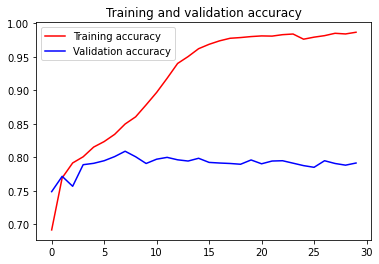

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

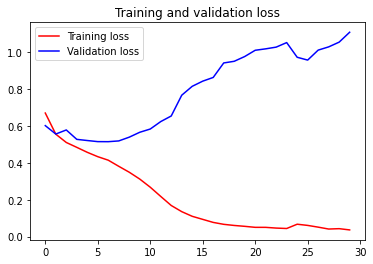

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(x_test, batch_size=50)
labels = ['Tiêu cực', 'Trung tính', 'Tích cực']

In [ ]:
predY = []
testY = []
for i in range(2000):
  y_p = np.argmax(y_pred[i])
  y_t = np.argmax(y_test[i])
  predY.append(y_p)
  testY.append(y_t)

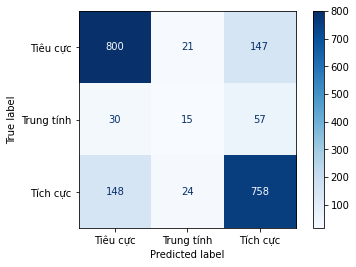

In [ ]:
cm = confusion_matrix(testY, predY)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(testY, predY, target_names=labels))

              precision    recall  f1-score   support

    Tiêu cực       0.82      0.83      0.82       968
  Trung tính       0.25      0.15      0.19       102
    Tích cực       0.79      0.82      0.80       930

    accuracy                           0.79      2000
   macro avg       0.62      0.60      0.60      2000
weighted avg       0.78      0.79      0.78      2000

